Bước 1: Khai báo thư viện

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Bước 2  : Đọc dữ liệu 

In [2]:
df=pd.read_excel('TuHocCuaSinhVien.xlsx')
print(df.head())

    Year                       Major Gender Environment  \
0  Năm 1  Hệ thống thông tin quản lý     Nữ          Có   
1  Năm 4  Hệ thống thông tin quản lý    Nam       Không   
2  Năm 3         Công nghệ thông tin    Nam          Có   
3  Năm 1         Công nghệ thông tin    Nam          Có   
4  Năm 1           Khoa học máy tính     Nữ          Có   

                   PreferenceOfEnvironment  \
0                                 Yên Tĩnh   
1                             Có Thể Ồn Ào   
2                Yên Tĩnh, Có Thể Yên Tĩnh   
3  Yên Tĩnh, Có Thể Yên Tĩnh, Có Thể Ồn Ào   
4  Yên Tĩnh, Có Thể Yên Tĩnh, Có Thể Ồn Ào   

                                            Location Weather  \
0             Thư viện , nhà sách, Trường học, Ở Nhà      Có   
1                   Quán nước, Ở Nhà, Tất cả mọi nơi   Không   
2  Thư viện , nhà sách, Trường học, Quán nước, Tấ...      Có   
3  Thư viện , nhà sách, Trường học, Quán nước, Ở ...      Có   
4  Thư viện , nhà sách, Trường học, Quán nước, Ở

Xem 10 dòng đầu của bộ dữ liệu

In [3]:
df.head(10)

,Year,Major,Gender,Environment,PreferenceOfEnvironment,Location,Weather,PreferenceOfWeather,Duration,Frequency,...,FacilitiesSupportSelfStudy,TeacherEncouragementSupport,SchoolTeacherRegulations,SchoolTeacherManagement,FamilyEconomicConditions,ClassSelfStudyMovement,AcademicEnvironmentEvents,ClassSchoolActivities,SchoolScheduleArrangements,GPA
0,Năm 1,Hệ thống thông tin quản lý,Nữ,Có,Yên Tĩnh,"Thư viện , nhà sách, Trường học, Ở Nhà",Có,Mát mẻ,Chiều,3-4 ngày,...,Ít,Ít,Không có,Ít,Nhiều,Không có,Ít,Nhiều,Ít,3.227903
1,Năm 4,Hệ thống thông tin quản lý,Nam,Không,Có Thể Ồn Ào,"Quán nước, Ở Nhà, Tất cả mọi nơi",Không,"Mưa, Mưa nhẹ, Mát mẻ",Chiều,3-4 ngày,...,Không có,Ít,Không có,Ít,Ít,Nhiều,Không có,Nhiều,Không có,2.135091
2,Năm 3,Công nghệ thông tin,Nam,Có,"Yên Tĩnh, Có Thể Yên Tĩnh","Thư viện , nhà sách, Trường học, Quán nước, Tấ...",Có,"Mưa, Mưa nhẹ, Có mây",Chiều,1-2 ngày,...,Ít,Ít,Nhiều,Nhiều,Ít,Nhiều,Ít,Nhiều,Nhiều,2.394300
3,Năm 1,Công nghệ thông tin,Nam,Có,"Yên Tĩnh, Có Thể Yên Tĩnh, Có Thể Ồn Ào","Thư viện , nhà sách, Trường học, Quán nước, Ở ...",Có,Mát mẻ,Tối,1-2 ngày,...,Ít,Ít,Ít,Ít,Ít,Ít,Ít,Ít,Ít,3.213467
4,Năm 1,Khoa học máy tính,Nữ,Có,"Yên Tĩnh, Có Thể Yên Tĩnh, Có Thể Ồn Ào","Thư viện , nhà sách, Trường học, Quán nước, Ở ...",Có,"Nắng, Mưa, Mưa nhẹ, Có mây, Mát mẻ",Tối,Ngày nào cũng học,...,Ít,Ít,Ít,Ít,Ít,Ít,Ít,Ít,Ít,3.097455
5,Năm 1,Hệ thống thông tin quản lý,Nữ,Có,Có Thể Ồn Ào,Tất cả mọi nơi,Không,"Mưa, Mưa nhẹ, Có mây, Mát mẻ",Khuya,3-4 ngày,...,Nhiều,Nhiều,Nhiều,Ít,Không có,Không có,Không có,Nhiều,Nhiều,0.113896
6,Năm 3,Hệ thống thông tin quản lý,Nữ,Có,"Yên Tĩnh, Có Thể Ồn Ào","Trường học, Quán nước, Ở Nhà",Có,Nắng,Trưa,Ngày nào cũng học,...,Ít,Nhiều,Nhiều,Ít,Ít,Ít,Nhiều,Nhiều,Ít,0.114455
7,Năm 3,Hệ thống thông tin quản lý,Nữ,Có,Yên Tĩnh,"Trường học, Quán nước",Có,"Mưa nhẹ, Có mây, Mát mẻ",Sáng,1-2 ngày,...,Ít,Ít,Không có,Không có,Ít,Ít,Ít,Ít,Nhiều,1.811631
8,Năm 1,Hệ thống thông tin quản lý,Nữ,Có,Yên Tĩnh,"Thư viện , nhà sách, Trường học, Ở Nhà",Có,Mát mẻ,Chiều,3-4 ngày,...,Ít,Ít,Không có,Ít,Nhiều,Không có,Ít,Nhiều,Ít,3.807060
9,Năm 3,Hệ thống thông tin quản lý,Nữ,Có,Yên Tĩnh,"Trường học, Quán nước",Có,"Mưa nhẹ, Có mây, Mát mẻ",Sáng,1-2 ngày,...,Ít,Ít,Không có,Không có,Ít,Ít,Ít,Ít,Nhiều,2.168939


Xem kích thước bộ dữ liệu

In [4]:
df.shape

(1200, 86)

Loại dữ liệu của các Trường

In [5]:
# df.dtypes

Thống kê giá trị định lượng các thuộc tính

df.describe()

Kiểm tra dữ liệu bị thiếu

In [6]:
df.isnull().sum()

Year                          0
Major                         0
Gender                        0
Environment                   0
PreferenceOfEnvironment       0
                             ..
ClassSelfStudyMovement        0
AcademicEnvironmentEvents     0
ClassSchoolActivities         0
SchoolScheduleArrangements    0
GPA                           0
Length: 86, dtype: int64

Bước 4: Tiền xử lý dữ liệu


In [7]:
lb_make = LabelEncoder()
# preference_mapping = {'Yên Tĩnh': 0, 'Có Thể Yên Tĩnh': 1, 'Có Thể Ồn Ào': 2}
# Location_mapping={'Ở Nhà':0,'Thư viện':1 , 'nhà sách':2, 'Trường học':3, 'Quán nước':4, 'Tất cả mọi nơi':5 }
# PreferenceOfWeather_mapping={'Nắng':0, 'Mưa':1, 'Mưa nhẹ':2, 'Có mây':3, 'Mát mẻ':4}
# Purpose_mapping={'Để đạt điểm cao':0,'Biết thêm nhiều kiến thức':1,'Để có được công việc':2,'Rèn luyện thói quen học tập của mình':3}
# AcademicChallengesFaced_mapping={'Chương trình học quá nặng':0,'Thời gian học trên lớp quá nhiều':1,'Quá nhiều bài tập về nhà':2,'Không biết học phương pháp nào cho hiệu quả':3, 'khả năng tiếp thu kém':4,'Khả năng tiếp thu kém':4,'Khó khăn khi tìm tài liệu':5,'Tất cả các ý trên':6}

# df['PreferenceOfEnvironment'] = df['PreferenceOfEnvironment'].apply(lambda x: ', '.join([str(preference_mapping[pref.strip()]) for pref in x.split(',')]))
# df['Location'] = df['Location'].apply(lambda x: ', '.join([str(Location_mapping[pref.strip()]) for pref in x.split(',')]))
# df['PreferenceOfWeather'] = df['PreferenceOfWeather'].apply(lambda x: ', '.join([str(PreferenceOfWeather_mapping[pref.strip()]) for pref in x.split(',')]))
# df['Purpose'] = df['Purpose'].apply(lambda x: ', '.join([str(Purpose_mapping[pref.strip()]) for pref in x.split(',')]))
# df['AcademicChallengesFaced'] = df['AcademicChallengesFaced'].apply(lambda x: ', '.join([str(AcademicChallengesFaced_mapping[pref.strip()]) for pref in x.split(',')]))
# Thay thế các giá trị bằng các số tương ứng
# df.replace({
#     'Thường xuyên': 2,
#     'Thỉnh thoảng': 1,
#     'Không có': 0,
#     'Phân vân': 2,
#     'Không đồng ý': 1,
#     'Đồng ý': 3,
#     'Hoàn toàn đồng ý': 4,
#     'Rất không đồng ý': 0,
#     'Không': 0,
#     'Có': 1,
#     'Ít': 1,
#     'Nhiều': 2
# }, inplace=True)

# Tạo bản sao của dataframe
df_transformed = df.copy()

# Tạo đối tượng LabelEncoder
lb_make = LabelEncoder()

# Duyệt qua từng cột và áp dụng LabelEncoder, ngoại trừ cột GPA
for column in df_transformed.columns:
        df_transformed[column] = df_transformed[column].astype(str)  # Chuyển cột về kiểu chuỗi
        df_transformed[column] = lb_make.fit_transform(df_transformed[column])
        print(column)

# Giữ nguyên cột GPA từ dataframe gốc
df_transformed['GPA'] = df['GPA']







Year
Major
Gender
Environment
PreferenceOfEnvironment
Location
Weather
PreferenceOfWeather
Duration
Frequency
Commitment
Employment
Purpose
PreferenceOfTime
Platform
Collaboration
Influence.
ImpactOfTeacher
ResourceAvailabilityIssues
Workload
CompletionTimeRequired
LibraryResourceSearch
AcademicChallengesFaced
IndependentLearningProcess
PlanningAndImplementation
ExplorationAndEnrichment
CompletingAssignments
IndependentLearning
UsingLearningResources

ScientificEffortRequired
PassionateLearning
EssentialLearningActivity
MasteringClassroomKnowledge
ExpandingKnowledgeBase
DevelopingThinkingSkills
CultivatingGoodHabits
PromotingIndependenceAndCreativity
BuildingSoftSkills
FosteringLearningEnthusiasm
ImprovingAcademicPerformance
EnhancingCareerAdaptability
NotNecessaryGood

TimeConsumingPressure
DesireExpandKnowledge
SelfDirectedTasks
UtilizeFreeTime
SolveLearningProblems
PassionateSelfStudy
PersistentEffectiveEffort
UnsatisfiedUnfinishedTasks
IndependentCreativeStudy
StudyWhenRequired
Tir

Bước 6: Phần tích dữ liệu phần 1


Phân tích sư tương quan giữa các dòng dữ liệu

Text(0.5, 1.0, 'Mối tương quan giữa nằm học và giới tính')

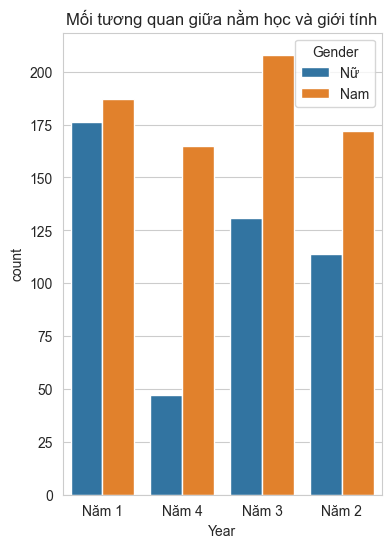

In [8]:
# Trực quan hóa dữ liệu với biểu đồ cột
plt.figure(figsize=(14, 6))
# Biểu đồ cột cho Major
plt.subplot(1, 3, 1)
sns.countplot(x='Year',hue='Gender', data=df)
plt.title('Mối tương quan giữa nằm học và giới tính')





0. Suy nghĩ của sinh viên về các yếu tố ảnh hưởng

In [9]:
# # Giả sử df_transformed đã tồn tại và có các cột tương ứng
# data = {
#     'Year': df_transformed['Year'],
#     'Gender': df_transformed['Gender'],
#     'PreferenceOfTime': df_transformed['PreferenceOfTime'],
#     'Influence.': df_transformed['Influence.'],
#     'Weather': df_transformed['Weather'],
#     'Environment': df_transformed['Environment'],
#     'Employment': df_transformed['Employment']
# }
# 
# df1 = pd.DataFrame(data)
# 
# # Bước 1: Nhóm dữ liệu theo Giới tính và Năm học
# grouped_df = df1.groupby(['Gender']).size().reset_index(name='Count')
# 
# # Bước 2: Tạo DataFrame rỗng để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Bước 3: Thống kê số lượng giá trị trong mỗi cột cho từng nhóm Giới tính và Năm học
# for column in df1.columns[2:]:  # Bỏ cột 'Gender' và 'Year' vì chúng đã được nhóm
#     counts = df1.groupby(['Gender'])[column].value_counts().unstack(fill_value=0)
#     counts.columns = [f'{column}: {val}' for val in counts.columns]  # Gắn nhãn chi tiết cho từng giá trị
#     summary = pd.concat([summary, counts], axis=1)
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Bước 4: Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='Blues')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# 
# # Bước 5: Tính tổng số dòng cho từng nhóm giới tính và năm học
# total_counts = df1.groupby(['Gender']).size()
# 
# # Tính phần trăm trên tổng số lượng của từng nhóm
# percentage_summary = (summary.div(total_counts, axis=0)) * 100  # Chia theo tổng số của từng nhóm
# 
# # Bước 6: Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col}' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Purples')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)
# 
# # /////////////////////////////////////////
# df1 = pd.DataFrame(data)
# 
# # Bước 1: Nhóm dữ liệu theo Giới tính và Năm học
# grouped_df = df1.groupby(['Year']).size().reset_index(name='Count')
# 
# # Bước 2: Tạo DataFrame rỗng để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Bước 3: Thống kê số lượng giá trị trong mỗi cột cho từng nhóm Giới tính và Năm học
# for column in df1.columns[2:]:  # Bỏ cột 'Gender' và 'Year' vì chúng đã được nhóm
#     counts = df1.groupby(['Year'])[column].value_counts().unstack(fill_value=0)
#     counts.columns = [f'{column}: {val}' for val in counts.columns]  # Gắn nhãn chi tiết cho từng giá trị
#     summary = pd.concat([summary, counts], axis=1)
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Bước 4: Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='Blues')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# 
# # Bước 5: Tính tổng số dòng cho từng nhóm giới tính và năm học
# total_counts = df1.groupby(['Year']).size()
# 
# # Tính phần trăm trên tổng số lượng của từng nhóm
# percentage_summary = (summary.div(total_counts, axis=0)) * 100  # Chia theo tổng số của từng nhóm
# 
# # Bước 6: Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} ' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Purples')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)
# 


1. Thói Quen Tự Học của Sinh Viên

In [10]:
# # 1. Tần suất tự học mỗi tuần
# plt.figure(figsize=(10,6))
# sns.histplot(data=df, x='Commitment', hue='Gender', bins=10, kde=True)
# plt.title('Tần suất tự học mỗi tuần theo giới tính', fontsize=16)
# plt.xlabel('Số giờ tự học mỗi tuần')
# plt.ylabel('Số lượng sinh viên')
# plt.show()
# 
# 
# plt.figure(figsize=(10,6))
# sns.histplot(data=df, x='Commitment', hue='Year', bins=10, kde=True)
# plt.title('Tần suất tự học mỗi tuần theo năm học', fontsize=16)
# plt.xlabel('Số giờ tự học mỗi tuần')
# plt.ylabel('Số lượng sinh viên')
# plt.show()
# 2. Địa điểm tự học phổ biến

# df['Location'] = df['Location'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['Location'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# 
# challenges = df.explode('Location')
# 
# 
# # Đếm số lần xuất hiện của từng khó khăn
# count_df = challenges.groupby('Location').size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn
# total_counts = count_df['Frequency'].sum()
# count_df['Percentage'] = (count_df['Frequency'] / total_counts) * 100
# 
# # Vẽ biểu đồ tròn cho tỷ lệ môi trường cho sinh viên
# plt.figure(figsize=(4, 4))
# plt.pie(count_df['Frequency'],  
#         labels=count_df['Location'], 
#         autopct='%1.1f%%', startangle=40)
# plt.title('Tỷ lệ mục đích việc tự học của sinh viên', y=1.1)  # Điều chỉnh khoảng cách tiêu đề
# plt.axis('equal')  # Đảm bảo biểu đồ tròn
# plt.show()
# data = {
#     'Location': df['Location'],
#     'Gender': df['Gender']
# }
# 
# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['Location'] = df['Location'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['Location'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# challenges = df.explode('Location')
# 
# # Đếm số lần xuất hiện của từng khó khăn theo năm học
# count_df = challenges.groupby(['Gender', 'Location']).size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn cho từng năm
# total_counts = count_df.groupby('Gender')['Frequency'].sum().reset_index()
# total_counts.columns = ['Gender', 'Total Frequency']
# 
# # Tính tỷ lệ phần trăm
# count_df = count_df.merge(total_counts, on='Gender')
# count_df['Percentage'] = (count_df['Frequency'] / count_df['Total Frequency']) * 100
# 
# 
# # Vẽ biểu đồ tròn cho từng năm học
# for year in count_df['Gender'].unique():
#     plt.figure(figsize=(4, 4))
#     plt.pie(count_df[count_df['Gender'] == year]['Frequency'], 
#             labels=count_df[count_df['Gender'] == year]['Location'], 
#             autopct='%1.1f%%', startangle=40)
#     plt.title(f'Tỷ lệ nơi học thuật cho sinh viên {year}')
#     plt.axis('equal')  # Đảm bảo biểu đồ tròn
#     plt.show()
# 3. Thời điểm tự học hiệu quả nhất
# plt.figure(figsize=(10,6))
# sns.countplot(x='Duration', hue='Year', data=df, order=df['Duration'].value_counts().index)
# plt.title('Thời điểm tự học hiệu quả nhất', fontsize=16)
# plt.xlabel('Thời điểm')
# plt.ylabel('Số lượng sinh viên')
# plt.legend(title='Năm học')
# plt.show()
# 
# # 4. Mức độ của sinh viên tự học
# plt.figure(figsize=(10,6))
# sns.countplot(x='Frequency', hue='Gender', data=df, order=df['Frequency'].value_counts().index)
# plt.title('Mức độ thường xuyên của sinh viên', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Mức độ')
# plt.legend(title='Giới tính')
# plt.show()
# 
# plt.figure(figsize=(10,6))
# sns.countplot(x='Frequency', hue='Duration', data=df, order=df['Frequency'].value_counts().index)
# plt.title('Mức độ thường xuyên theo buổi học của sinh viên', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Mức độ')
# plt.legend(title='Năm học')
# plt.show()




   2. Phương Pháp Tự Học

In [11]:
#  # 1. Các phương pháp học phổ biến
# plt.figure(figsize=(10,6))
# sns.countplot(x='Platform',hue='Gender', data=df, order=df['Platform'].value_counts().index)
# plt.title('Các phương pháp học phổ biến', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Phương pháp học')
# plt.show()
# plt.figure(figsize=(10,6))
# sns.countplot(x='Platform',hue='Year', data=df, order=df['Platform'].value_counts().index)
# plt.title('Các phương pháp học phổ biến', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Phương pháp học')
# plt.show()
# 
# # 2. Phương pháp tự học hiệu quả nhất
# plt.figure(figsize=(10,6))
# sns.countplot(x='LibraryResourceSearch',hue='Gender', data=df, order=df['LibraryResourceSearch'].value_counts().index)
# plt.title('Thời gian lên thư viện hoặc tìm tài liệu trên thư viện', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Lên thư viện')
# plt.show()
# plt.figure(figsize=(10,6))
# sns.countplot(x='LibraryResourceSearch',hue='Year', data=df, order=df['LibraryResourceSearch'].value_counts().index)
# plt.title('Thời gian lên thư viện hoặc tìm tài liệu trên thư viện', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Lên thư viện')
# plt.show()
# # 3. Mối quan hệ giữa người học và giới tính , năm học 
# 
# plt.figure(figsize=(10,6))
# sns.histplot(data=df, x='Collaboration', hue='Gender', bins=10, kde=True)
# plt.title('Mối quan hệ giữa người học và giới tính', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Giới tính')
# plt.show()
# 
# plt.figure(figsize=(10,6))
# sns.histplot(data=df, x='Collaboration',hue='Year', bins=10, kde=True)
# plt.title('Mối quan hệ giữa người học và giới tính', fontsize=16)
# plt.xlabel('Số lượng sinh viên')
# plt.ylabel('Giới tính')
# plt.show()  

3. Nơi học và không gian học

In [12]:

# Biểu đồ cột cho môi trường học tập ưa thích

# 
# data = {
#     'PreferenceOfEnvironment': df['PreferenceOfEnvironment'],
#     'Gender': df['Gender']
# }
# 
# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['PreferenceOfEnvironment'] = df['PreferenceOfEnvironment'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['PreferenceOfEnvironment'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# challenges = df.explode('PreferenceOfEnvironment')
# 
# # Đếm số lần xuất hiện của từng khó khăn theo năm học
# count_df = challenges.groupby(['Gender', 'PreferenceOfEnvironment']).size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn cho từng năm
# total_counts = count_df.groupby('Gender')['Frequency'].sum().reset_index()
# total_counts.columns = ['Gender', 'Total Frequency']
# 
# # Tính tỷ lệ phần trăm
# count_df = count_df.merge(total_counts, on='Gender')
# count_df['Percentage'] = (count_df['Frequency'] / count_df['Total Frequency']) * 100
# 
# # Hiển thị kết quả
# print(count_df)
# 
# # Vẽ biểu đồ tròn cho từng năm học
# for year in count_df['Gender'].unique():
#     plt.figure(figsize=(4, 4))
#     plt.pie(count_df[count_df['Gender'] == year]['Frequency'], 
#             labels=count_df[count_df['Gender'] == year]['PreferenceOfEnvironment'], 
#             autopct='%1.1f%%', startangle=40)
#     plt.title(f'Tỷ lệ môi trường cho sinh viên {year}',y=1.2)
#     plt.axis('equal')  # Đảm bảo biểu đồ tròn
#     plt.show()
# Nhập dữ liệu vào DataFrame
# data = {
#     'PreferenceOfEnvironment': df['PreferenceOfEnvironment'],
# }
# 
# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['PreferenceOfEnvironment'] = df['PreferenceOfEnvironment'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['PreferenceOfEnvironment'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# 
# challenges = df.explode('PreferenceOfEnvironment')
# 
# # Thay đổi nhãn 'Yên Tĩnh' thành 'Cả 2'
# challenges['PreferenceOfEnvironment'] = challenges['PreferenceOfEnvironment'].replace('Yên Tĩnh', 'Cả 2')
# # Đếm số lần xuất hiện của từng khó khăn
# count_df = challenges.groupby('PreferenceOfEnvironment').size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn
# total_counts = count_df['Frequency'].sum()
# count_df['Percentage'] = (count_df['Frequency'] / total_counts) * 100
# 
# # Vẽ biểu đồ tròn cho tỷ lệ môi trường cho sinh viên
# plt.figure(figsize=(4, 4))
# plt.pie(count_df['Frequency'],  
#         labels=count_df['PreferenceOfEnvironment'], 
#         autopct='%1.1f%%', startangle=40)
# plt.title('Tỷ lệ môi trường cho sinh viên', y=1.1)  # Điều chỉnh khoảng cách tiêu đề
# plt.axis('equal')  # Đảm bảo biểu đồ tròn
# plt.show()
# Nhập dữ liệu vào DataFrame
# data = {
#     'PreferenceOfWeather': df['PreferenceOfWeather'],
# }

# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['PreferenceOfWeather'] = df['PreferenceOfWeather'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['PreferenceOfWeather'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# 
# challenges = df.explode('PreferenceOfWeather')
# 
# 
# # Đếm số lần xuất hiện của từng khó khăn
# count_df = challenges.groupby('PreferenceOfWeather').size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn
# total_counts = count_df['Frequency'].sum()
# count_df['Percentage'] = (count_df['Frequency'] / total_counts) * 100
# 
# # Vẽ biểu đồ tròn cho tỷ lệ môi trường cho sinh viên
# plt.figure(figsize=(4, 4))
# plt.pie(count_df['Frequency'],  
#         labels=count_df['PreferenceOfWeather'], 
#         autopct='%1.1f%%', startangle=40)
# plt.title('Tỷ lệ môi trường cho sinh viên', y=1.1)  # Điều chỉnh khoảng cách tiêu đề
# plt.axis('equal')  # Đảm bảo biểu đồ tròn
# plt.show()
#     #2 Tính toán tỷ lệ phần trăm các giá trị  theo từng 'Year'
# data = {
#     'PreferenceOfWeather': df['PreferenceOfWeather'],
#     'Gender': df['Gender']
# }
# 
# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['PreferenceOfWeather'] = df['PreferenceOfWeather'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['PreferenceOfWeather'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# challenges = df.explode('PreferenceOfWeather')
# 
# # Đếm số lần xuất hiện của từng khó khăn theo năm học
# count_df = challenges.groupby(['Gender', 'PreferenceOfWeather']).size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn cho từng năm
# total_counts = count_df.groupby('Gender')['Frequency'].sum().reset_index()
# total_counts.columns = ['Gender', 'Total Frequency']
# 
# # Tính tỷ lệ phần trăm
# count_df = count_df.merge(total_counts, on='Gender')
# count_df['Percentage'] = (count_df['Frequency'] / count_df['Total Frequency']) * 100
# 
# 
# 
# # Vẽ biểu đồ tròn cho từng năm học
# for year in count_df['Gender'].unique():
#     plt.figure(figsize=(4, 4))
#     plt.pie(count_df[count_df['Gender'] == year]['Frequency'], 
#             labels=count_df[count_df['Gender'] == year]['PreferenceOfWeather'], 
#             autopct='%1.1f%%', startangle=40)
#     plt.title(f'Tỷ lệ các thời tiết học cho sinh viên {year}',y=1.2)
#     plt.axis('equal')  # Đảm bảo biểu đồ tròn
#     plt.show()

4. Mục đích và khó khăn

In [13]:


# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['Purpose'] = df['Purpose'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['Purpose'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# 
# challenges = df.explode('Purpose')
# 
# 
# # Đếm số lần xuất hiện của từng khó khăn
# count_df = challenges.groupby('Purpose').size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn
# total_counts = count_df['Frequency'].sum()
# count_df['Percentage'] = (count_df['Frequency'] / total_counts) * 100
# 
# # Vẽ biểu đồ tròn cho tỷ lệ môi trường cho sinh viên
# plt.figure(figsize=(4, 4))
# plt.pie(count_df['Frequency'],  
#         labels=count_df['Purpose'], 
#         autopct='%1.1f%%', startangle=40)
# plt.title('Tỷ lệ mục đích việc tự học của sinh viên', y=1.1)  # Điều chỉnh khoảng cách tiêu đề
# plt.axis('equal')  # Đảm bảo biểu đồ tròn
# plt.show()
# #1 Tính toán tỷ lệ phần trăm các giá trị 'PreferenceOfWeather' theo từng 'Year'
# data = {
#     'Purpose': df['Purpose'],
#     'Year': df['Year']
# }
# 
# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['Purpose'] = df['Purpose'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['Purpose'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# challenges = df.explode('Purpose')
# 
# # Đếm số lần xuất hiện của từng khó khăn theo năm học
# count_df = challenges.groupby(['Year', 'Purpose']).size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn cho từng năm
# total_counts = count_df.groupby('Year')['Frequency'].sum().reset_index()
# total_counts.columns = ['Year', 'Total Frequency']
# 
# # Tính tỷ lệ phần trăm
# count_df = count_df.merge(total_counts, on='Year')
# count_df['Percentage'] = (count_df['Frequency'] / count_df['Total Frequency']) * 100
# 
# # Hiển thị kết quả
# print(count_df)
# 
# # Vẽ biểu đồ tròn cho từng năm học
# for year in count_df['Year'].unique():
#     plt.figure(figsize=(4, 4))
#     plt.pie(count_df[count_df['Year'] == year]['Frequency'], 
#             labels=count_df[count_df['Year'] == year]['Purpose'], 
#             autopct='%1.1f%%', startangle=40)
#     plt.title(f'Tỷ lệ các mục đích cho sinh viên {year}', y=1.2)
#     plt.axis('equal')  # Đảm bảo biểu đồ tròn
#     plt.show()

# #2 Tính toán tỷ lệ phần trăm các giá trị  theo từng 'Year'
# Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['AcademicChallengesFaced'] = df['AcademicChallengesFaced'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['AcademicChallengesFaced'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# 
# challenges = df.explode('AcademicChallengesFaced')
# 
# 
# # Đếm số lần xuất hiện của từng khó khăn
# count_df = challenges.groupby('AcademicChallengesFaced').size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn
# total_counts = count_df['Frequency'].sum()
# count_df['Percentage'] = (count_df['Frequency'] / total_counts) * 100
# 
# # Vẽ biểu đồ tròn cho tỷ lệ môi trường cho sinh viên
# explode = [0.08] * len(count_df)  # Tất cả các phần sẽ được giãn ra một chút
# 
# # Vẽ biểu đồ tròn với explode
# plt.figure(figsize=(4, 4))
# plt.pie(count_df['Frequency'],  
#         labels=count_df['AcademicChallengesFaced'], 
#         autopct='%1.1f%%', startangle=40, explode=explode)
# plt.title('Tỷ lệ mục đích tự học của sinh viên', y=1.1)  # Điều chỉnh khoảng cách tiêu đề
# plt.axis('equal')  # Đảm bảo biểu đồ tròn
# plt.show()
# data = {
#     'AcademicChallengesFaced': df['AcademicChallengesFaced'],
#     'Year': df['Year']
# }
# 
# # Tạo DataFrame
# df = pd.DataFrame(data)
# 
# # Tách các khó khăn thành danh sách và loại bỏ khoảng trắng
# df['AcademicChallengesFaced'] = df['AcademicChallengesFaced'].str.split(', ').apply(lambda x: [i.strip() for i in x if i.strip()])
# 
# # Kiểm tra xem có bản ghi nào rỗng không
# df = df[df['AcademicChallengesFaced'].str.len() > 0]
# 
# # Tạo một DataFrame mới để đếm số lần xuất hiện
# challenges = df.explode('AcademicChallengesFaced')
# 
# # Đếm số lần xuất hiện của từng khó khăn theo năm học
# count_df = challenges.groupby(['Year', 'AcademicChallengesFaced']).size().reset_index(name='Frequency')
# 
# # Tính tổng số khó khăn cho từng năm
# total_counts = count_df.groupby('Year')['Frequency'].sum().reset_index()
# total_counts.columns = ['Year', 'Total Frequency']
# 
# # Tính tỷ lệ phần trăm
# count_df = count_df.merge(total_counts, on='Year')
# count_df['Percentage'] = (count_df['Frequency'] / count_df['Total Frequency']) * 100
# 
# # Hiển thị kết quả
# print(count_df)
# 
# # Vẽ biểu đồ tròn cho từng năm học
# for year in count_df['Year'].unique():
#     plt.figure(figsize=(4, 4))
#     plt.pie(count_df[count_df['Year'] == year]['Frequency'], 
#             labels=count_df[count_df['Year'] == year]['AcademicChallengesFaced'], 
#             autopct='%1.1f%%', startangle=40)
#     plt.title(f'Tỷ lệ các khó khăn học thuật cho sinh viên {year}',y=1.2)
#     plt.axis('equal')  # Đảm bảo biểu đồ tròn
#     plt.show()

5. Khối lượng bài tập và thời gian hoàn thành của việc tự học

In [14]:
# # Biểu đồ cột cho môi trường học tập ưa thích
# 
# plt.figure(figsize=(10,6))
# sns.countplot(x='Year', hue='Workload', data=df, palette='Set2')
# plt.title('Thời gian khối lượng bài tập , nội dung phải tự học', fontsize=16)
# plt.xlabel('Năm học')
# plt.ylabel('Số lượng sinh viên')
# plt.legend(title='Thời gian ')
# plt.show()
# 
# 
# plt.figure(figsize=(10,6))
# sns.countplot(x='Year', hue='CompletionTimeRequired', data=df, palette='Set2')
# plt.title('Thời gian cần thiết để hoàn thành bài tập tự học', fontsize=16)
# plt.xlabel('Năm học')
# plt.ylabel('Số lượng sinh viên')
# plt.legend(title='Thời gian  ')
# plt.show()
# 
# plt.figure(figsize=(10,6))
# sns.countplot(x='Workload', hue='CompletionTimeRequired', data=df, palette='Set1')
# plt.title('Thời gian cần thiết để hoàn thành bài tập tự học', fontsize=16)
# plt.xlabel('Bài tập')
# plt.ylabel('Số lượng sinh viên')
# plt.legend(title='Thời gian  ')
# plt.show()
# 


6. Nhận thức của sinh viên về vai trò, ý nghĩa của tự học

In [15]:
# df1 = pd.DataFrame({
#     'Year': df['Year'],
#     'Gender':df['Gender'],
#     'EssentialLearningActivity': df['EssentialLearningActivity'],
#     'MasteringClassroomKnowledge': df['MasteringClassroomKnowledge'],	
#     'ExpandingKnowledgeBase':df['ExpandingKnowledgeBase'] ,
#     'DevelopingThinkingSkills' :df['DevelopingThinkingSkills'],	
#     'CultivatingGoodHabits':df['CultivatingGoodHabits']	,'PromotingIndependenceAndCreativity':df['PromotingIndependenceAndCreativity'],	'BuildingSoftSkills':df['BuildingSoftSkills']	
#     ,'FosteringLearningEnthusiasm':df['FosteringLearningEnthusiasm'],
#     'ImprovingAcademicPerformance':df['ImprovingAcademicPerformance'],
#     'EnhancingCareerAdaptability':df['EnhancingCareerAdaptability'],
# 	'TimeConsumingPressure' : df['TimeConsumingPressure'],
#     'NecessaryGood':df['NotNecessaryGood\n']
# })
# 
# 
# 
# # Tính trung bình cho từng cột
# mean_values = df1.drop(columns=['Year','Gender']).mean()
# 
# # Chuyển từ Series sang DataFrame để dễ định dạng
# mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])
# 
# 
# 
# # Tạo ma trận dễ nhìn hơn (in bảng kết quả với định dạng đẹp)
# print("Điểm trung bình cho từng cột:")
# styled_table1 = mean_values_df.style.format(precision=1).background_gradient(cmap='Oranges')
# # Hiển thị bảng định dạng đẹp
# display(styled_table1)
# print("Trung bình cộng của cột:")
# print(mean_values_df.mean())
# #1 Tính theo năm
# # Nhóm theo 'Year' và tính trung bình cho từng năm
# average_per_year = df1.drop(columns=['Gender']).groupby('Year').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_year.style.format(precision=2).background_gradient(cmap='Blues')
# display(styled_table)
# 
# 
# 
# print("Trung bình cộng của từng hàng:")
# print(average_per_year.mean(axis=1))
# 
# #2 Tính theo giới tính và năm học
# average_per_gender = df1.drop(columns=['Year']).groupby('Gender').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# print(average_per_gender.mean(axis=1))
# 
# #Tạo DataFrame từ dữ liệu
# data = df1.drop(columns=['Year','Gender'])
# 
# df1 = pd.DataFrame(data)
# 
# # Khởi tạo DataFrame để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Thống kê số lượng giá trị trong mỗi cột
# for column in df1.columns:
#     counts = df1[column].value_counts()  # Đếm số lượng từng giá trị
#     counts.name = column  # Đặt tên cho Series
#     summary = summary.join(counts, how='outer')  # Gộp kết quả vào DataFrame summary
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='Reds')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# # Tính tổng số dòng
# total_counts = df1.count()
# 
# # Tạo DataFrame để chứa kết quả phần trăm
# percentage_summary = summary.div(total_counts, axis=1) * 100  # Chia cho tổng số dòng và nhân với 100
# 
# # Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} (Phần trăm)' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Oranges')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)
# 



7.Tính tích cực tự học biểu hiện ở nhận thức của sinh viên về tự học 

In [16]:
# df2 = pd.DataFrame({
#     'Year': df['Year'],
#     'Gender':df['Gender'],
#     'IndependentLearningProcess': df['IndependentLearningProcess'],
#     'PlanningAndImplementation': df['PlanningAndImplementation'],
#     'ExplorationAndEnrichment':df['ExplorationAndEnrichment'] ,	
#     'CompletingAssignments' :df['CompletingAssignments'],	
#     'IndependentLearning':df['IndependentLearning']	,
#     'UsingLearningResources':df['UsingLearningResources\n'],
#     'ScientificEffortRequired':df['ScientificEffortRequired']
#     ,'PassionateLearning':df['PassionateLearning'],   
# })
# 
# 
# 
# # Tính trung bình cho từng cột
# mean_values = df2.drop(columns=['Year','Gender']).mean()
# 
# # Chuyển từ Series sang DataFrame để dễ định dạng
# mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])
# 
# 
# 
# # Tạo ma trận dễ nhìn hơn (in bảng kết quả với định dạng đẹp)
# print("Điểm trung bình cho từng cột:")
# styled_table1 = mean_values_df.style.format(precision=1).background_gradient(cmap='Reds')
# # Hiển thị bảng định dạng đẹp
# display(styled_table1)
# print("Trung bình cộng của từng hàng:")
# print(mean_values_df.mean())
# #1 Tính theo năm
# # Nhóm theo 'Year' và tính trung bình cho từng năm
# average_per_year = df2.drop(columns=['Gender']).groupby('Year').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_year.style.format(precision=2).background_gradient(cmap='Blues')
# display(styled_table)
# 
# print("Trung bình cộng của từng hàng:")
# display(average_per_year.mean(axis=1))
# #2 Tính theo giới tính và năm học
# average_per_gender_year = df2.groupby(['Gender', 'Year']).mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender_year.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# 
# #2 Tính theo giới tính và năm học
# average_per_gender = df2.drop(columns=['Year']).groupby('Gender').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# 
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender.mean(axis=1))
# #Tạo DataFrame từ dữ liệu
# data = df2.drop(columns=['Year','Gender'])
# 
# df = pd.DataFrame(data)
# 
# # Khởi tạo DataFrame để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Thống kê số lượng giá trị trong mỗi cột
# for column in df.columns:
#     counts = df[column].value_counts()  # Đếm số lượng từng giá trị
#     counts.name = column  # Đặt tên cho Series
#     summary = summary.join(counts, how='outer')  # Gộp kết quả vào DataFrame summary
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='Reds')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# # Tính tổng số dòng
# total_counts = df.count()
# 
# # Tạo DataFrame để chứa kết quả phần trăm
# percentage_summary = summary.div(total_counts, axis=1) * 100  # Chia cho tổng số dòng và nhân với 100
# 
# # Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} (Phần trăm)' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Oranges')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)

8.Thái độ của sinh viên đối với hoạt động tự học8. Thái độ của sinh viên đối với hoạt động tự họ

In [17]:
# df2 = pd.DataFrame({
#     'Year': df['Year'],
#     'Gender':df['Gender'],
#     'DesireExpandKnowledge': df['DesireExpandKnowledge'],
#     'SelfDirectedTasks': df['SelfDirectedTasks'],	
#     'UtilizeFreeTime':df['UtilizeFreeTime'] ,	
#     'SolveLearningProblems' :df['SolveLearningProblems'],	
#     'PassionateSelfStudy':df['PassionateSelfStudy']	,
#     'PersistentEffectiveEffort':df['PersistentEffectiveEffort'],
#     'UnsatisfiedUnfinishedTasks':df['UnsatisfiedUnfinishedTasks']
#     ,'IndependentCreativeStudy':df['IndependentCreativeStudy'],  
#     'StudyWhenRequired':df['StudyWhenRequired'],
#     'TiredSelfStudy':df['TiredSelfStudy']
# })
# 
# 
# # Tính trung bình cho từng cột
# mean_values = df2.drop(columns=['Year','Gender']).mean()
# 
# # Chuyển từ Series sang DataFrame để dễ định dạng
# mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])
# 
# print("Trung bình cộng của từng hàng:")
# display(mean_values_df.mean())
# 
# # Tạo ma trận dễ nhìn hơn (in bảng kết quả với định dạng đẹp)
# print("Điểm trung bình cho từng cột:")
# styled_table1 = mean_values_df.style.format(precision=1).background_gradient(cmap='Oranges')
# # Hiển thị bảng định dạng đẹp
# display(styled_table1)
# 
# #1 Tính theo năm
# # Nhóm theo 'Year' và tính trung bình cho từng năm
# average_per_year = df2.drop(columns=['Gender']).groupby('Year').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_year.style.format(precision=2).background_gradient(cmap='Blues')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_year.mean(axis=1))
# 
# #2 Tính theo giới tính và năm học
# average_per_gender_year = df2.groupby(['Gender', 'Year']).mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender_year.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# 
# #2 Tính theo giới tính và năm học
# average_per_gender = df2.drop(columns=['Year']).groupby('Gender').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# 
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender.mean(axis=1))
# #Tạo DataFrame từ dữ liệu
# data = df2.drop(columns=['Year','Gender'])
# 
# df = pd.DataFrame(data)
# 
# # Khởi tạo DataFrame để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Thống kê số lượng giá trị trong mỗi cột
# for column in df.columns:
#     counts = df[column].value_counts()  # Đếm số lượng từng giá trị
#     counts.name = column  # Đặt tên cho Series
#     summary = summary.join(counts, how='outer')  # Gộp kết quả vào DataFrame summary
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='Reds')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# # Tính tổng số dòng
# total_counts = df.count()
# 
# # Tạo DataFrame để chứa kết quả phần trăm
# percentage_summary = summary.div(total_counts, axis=1) * 100  # Chia cho tổng số dòng và nhân với 100
# 
# # Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} (Phần trăm)' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Oranges')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)

9.Mức độ thường xuyên thực hiện các hoạt động tự học ngoài giờ lên lớp của sinh viên

In [18]:
# df2 = pd.DataFrame({
#     'Year': df_transformed['Year'],
#     'Gender':df_transformed['Gender'],
#     'IdentifySelfStudyIssues': df_transformed['IdentifySelfStudyIssues'],
#     'PlanSelfStudy': df_transformed['PlanSelfStudy'],	
#     'SearchEffectiveStudyMethods':df_transformed['SearchEffectiveStudyMethods'] ,	
#     'ReviewOldLessonsHomework' :df_transformed['ReviewOldLessonsHomework'],	
#     'PrepareNewLessonClass':df_transformed['PrepareNewLessonClass']	,
#     'ResearchAdditionalMaterials':df_transformed['ResearchAdditionalMaterials'],
#     'VisitLibraryOnlineResearch':df_transformed['VisitLibraryOnlineResearch']
#     ,'DiscussStudyIssuesPeers':df_transformed['DiscussStudyIssuesPeers'],  
#     'ParticipateAcademicActivities':df_transformed['ParticipateAcademicActivities'],
#     'JoinStudyClubs':df_transformed['JoinStudyClubs'],
#     'ImmerseInRealEnvironment':df_transformed['ImmerseInRealEnvironment'],
#     'Analyst':df_transformed['Analyst'],
#     'AnalyzeCompareKnowledge':df_transformed['AnalyzeCompareKnowledge'],
#     'ApplyKnowledgeToLife':df_transformed['ApplyKnowledgeToLife']
# })
# 
# 
# # Tính trung bình cho từng cột
# mean_values = df2.drop(columns=['Year','Gender']).mean()
# 
# # Chuyển từ Series sang DataFrame để dễ định dạng
# mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])
# 
# print("Trung bình cộng của từng hàng:")
# display(mean_values_df.mean())
# 
# # Tạo ma trận dễ nhìn hơn (in bảng kết quả với định dạng đẹp)
# print("Điểm trung bình cho từng cột:")
# styled_table1 = mean_values_df.style.format(precision=1).background_gradient(cmap='Oranges')
# # Hiển thị bảng định dạng đẹp
# display(styled_table1)
# 
# #1 Tính theo năm
# # Nhóm theo 'Year' và tính trung bình cho từng năm
# average_per_year = df2.drop(columns=['Gender']).groupby('Year').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_year.style.format(precision=2).background_gradient(cmap='Blues')
# display(styled_table)
# 
# print("Trung bình cộng của từng hàng:")
# display(average_per_year.mean(axis=1))
# #2 Tính theo giới tính và năm học
# average_per_gender_year = df2.groupby(['Gender', 'Year']).mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender_year.style.format(precision=2).background_gradient(cmap='Purples')
# display(styled_table)
# 
# #2 Tính theo giới tính và năm học
# average_per_gender = df2.drop(columns=['Year']).groupby('Gender').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender.mean(axis=1))
# 
# #Tạo DataFrame từ dữ liệu
# data = df2.drop(columns=['Year','Gender'])
# 
# df = pd.DataFrame(data)
# 
# # Khởi tạo DataFrame để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Thống kê số lượng giá trị trong mỗi cột
# for column in df.columns:
#     counts = df[column].value_counts()  # Đếm số lượng từng giá trị
#     counts.name = column  # Đặt tên cho Series
#     summary = summary.join(counts, how='outer')  # Gộp kết quả vào DataFrame summary
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='Reds')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# # Tính tổng số dòng
# total_counts = df.count()
# 
# # Tạo DataFrame để chứa kết quả phần trăm
# percentage_summary = summary.div(total_counts, axis=1) * 100  # Chia cho tổng số dòng và nhân với 100
# 
# # Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} (Phần trăm)' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Greys')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)

10.Các yếu tố chủ quan ảnh hưởng đến tính tích cực tự học của sinh viên 

In [19]:
# df3 = pd.DataFrame({
#     'Year': df['Year'],
#     'Gender':df['Gender'],
#     'AssessSelfStudyActivities': df['AssessSelfStudyActivities'],
#     'StudyCareerInterest': df['StudyCareerInterest'],	
#     'LearningMotivation':df['LearningMotivation'],
#     'LearningAttitude':df['LearningAttitude'] ,	
#     'FundamentalKnowledge' :df['FundamentalKnowledge'],	
#     'SelfStudyExperience':df['SelfStudyExperience']	,
#     'SelfStudySkills':df['SelfStudySkills']
# 
# })
# 
# 
# # Tính trung bình cho từng cột
# mean_values = df3.drop(columns=['Year','Gender']).mean()
# 
# # Chuyển từ Series sang DataFrame để dễ định dạng
# mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])
# 
# print("Trung bình cộng của từng hàng:")
# display(mean_values_df.mean())
# 
# # Tạo ma trận dễ nhìn hơn (in bảng kết quả với định dạng đẹp)
# print("Điểm trung bình cho từng cột:")
# styled_table1 = mean_values_df.style.format(precision=1).background_gradient(cmap='Oranges')
# # Hiển thị bảng định dạng đẹp
# display(styled_table1)
# 
# #1 Tính theo năm
# # Nhóm theo 'Year' và tính trung bình cho từng năm
# average_per_year = df3.drop(columns=['Gender']).groupby('Year').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_year.style.format(precision=2).background_gradient(cmap='Blues')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_year.mean(axis=1))
# 
# #2 Tính theo giới tính và năm học
# average_per_gender_year = df3.groupby(['Gender', 'Year']).mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender_year.style.format(precision=2).background_gradient(cmap='Greens')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender_year.mean(axis=1))
# #2 Tính theo giới tính và năm học
# average_per_gender = df3.drop(columns=['Year']).groupby('Gender').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender.style.format(precision=2).background_gradient(cmap='coolwarm')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender.mean(axis=1))
# 
# #Tạo DataFrame từ dữ liệu
# data = df3.drop(columns=['Year','Gender'])
# 
# df = pd.DataFrame(data)
# 
# # Khởi tạo DataFrame để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Thống kê số lượng giá trị trong mỗi cột
# for column in df.columns:
#     counts = df[column].value_counts()  # Đếm số lượng từng giá trị
#     counts.name = column  # Đặt tên cho Series
#     summary = summary.join(counts, how='outer')  # Gộp kết quả vào DataFrame summary
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='RdBu')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# # Tính tổng số dòng
# total_counts = df.count()
# 
# # Tạo DataFrame để chứa kết quả phần trăm
# percentage_summary = summary.div(total_counts, axis=1) * 100  # Chia cho tổng số dòng và nhân với 100
# 
# # Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} (Phần trăm)' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='Spectral')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)

11.Mức độ ảnh hưởng của các yếu tố khách quan đến tính tích cực tự học của sinh viên

In [20]:
# df4 = pd.DataFrame({
#     'Year': df['Year'],
#     'Gender':df['Gender'],
#     'CourseContentCurriculum': df['CourseContentCurriculum'],
#     'InstructorTeachingMethods': df['InstructorTeachingMethods'],	
#     'FacilitiesSupportSelfStudy':df['FacilitiesSupportSelfStudy'] ,	
#     'TeacherEncouragementSupport' :df['TeacherEncouragementSupport'],	
#     'SchoolTeacherRegulations':df['SchoolTeacherRegulations']	,
#     'SchoolTeacherManagement':df['SchoolTeacherManagement'],
#     'FamilyEconomicConditions':df['FamilyEconomicConditions']
#     ,'ClassSelfStudyMovement':df['ClassSelfStudyMovement'],  
#     'AcademicEnvironmentEvents':df['AcademicEnvironmentEvents'],
#     'ClassSchoolActivities':df['ClassSchoolActivities'],
#     'SchoolScheduleArrangements':df['SchoolScheduleArrangements']
# })
# 
# 
# # Tính trung bình cho từng cột
# mean_values = df4.drop(columns=['Year','Gender']).mean()
# 
# # Chuyển từ Series sang DataFrame để dễ định dạng
# mean_values_df = pd.DataFrame(mean_values, columns=['Mean'])
# 
# 
# print("Trung bình cộng của từng hàng:")
# display(mean_values_df.mean())
# # Tạo ma trận dễ nhìn hơn (in bảng kết quả với định dạng đẹp)
# print("Điểm trung bình cho từng cột:")
# styled_table1 = mean_values_df.style.format(precision=1).background_gradient(cmap='Oranges')
# # Hiển thị bảng định dạng đẹp
# display(styled_table1)
# 
# #1 Tính theo năm
# # Nhóm theo 'Year' và tính trung bình cho từng năm
# average_per_year = df4.drop(columns=['Gender']).groupby('Year').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_year.style.format(precision=2).background_gradient(cmap='RdYlGn')
# display(styled_table)
# 
# print("Trung bình cộng của từng hàng:")
# display(average_per_year.mean(axis=1))
# #2 Tính theo giới tính và năm học
# average_per_gender_year = df4.groupby(['Gender', 'Year']).mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender_year.style.format(precision=2).background_gradient(cmap='twilight')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender_year.mean(axis=1))
# #2 Tính theo giới tính và năm học
# average_per_gender = df4.drop(columns=['Year']).groupby('Gender').mean()
# print("Điểm trung bình cho từng năm học :")
# styled_table = average_per_gender.style.format(precision=2).background_gradient(cmap='Pastel1')
# display(styled_table)
# print("Trung bình cộng của từng hàng:")
# display(average_per_gender.mean(axis=1))
# 
# #Tạo DataFrame từ dữ liệu
# data = df4.drop(columns=['Year','Gender'])
# 
# df = pd.DataFrame(data)
# 
# # Khởi tạo DataFrame để chứa kết quả thống kê
# summary = pd.DataFrame()
# 
# # Thống kê số lượng giá trị trong mỗi cột
# for column in df.columns:
#     counts = df[column].value_counts()  # Đếm số lượng từng giá trị
#     counts.name = column  # Đặt tên cho Series
#     summary = summary.join(counts, how='outer')  # Gộp kết quả vào DataFrame summary
# 
# # Điền giá trị NaN bằng 0 để dễ đọc
# summary = summary.fillna(0)
# 
# # Chuyển đổi kiểu dữ liệu thành số nguyên
# summary = summary.astype(int)
# 
# # Tạo bảng định dạng đẹp
# styled_summary = summary.style.format(precision=0).background_gradient(cmap='flag')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_summary)
# # Tính tổng số dòng
# total_counts = df.count()
# 
# # Tạo DataFrame để chứa kết quả phần trăm
# percentage_summary = summary.div(total_counts, axis=1) * 100  # Chia cho tổng số dòng và nhân với 100
# 
# # Đặt tên cho các cột với "Phần trăm" ở cuối
# percentage_summary.columns = [f'{col} (Phần trăm)' for col in percentage_summary.columns]
# 
# # Tạo bảng định dạng đẹp cho phần trăm
# styled_percentage_summary = percentage_summary.style.format(precision=1).background_gradient(cmap='ocean')
# 
# # Hiển thị bảng định dạng đẹp
# display(styled_percentage_summary)

12.Mô hình kmean

In [21]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Giả định bạn đã có DataFrame df_transformed chứa các cột liên quan, ngoại trừ GPA
# df = pd.DataFrame(df_transformed)
# 
# # Xóa các cột không cần thiết cho phân cụm (nếu cần), ở đây giả định cột 'GPA' không dùng
# X = df.drop(columns=['GPA'])
# 
# # Chuẩn hóa dữ liệu vì K-Means cũng nhạy cảm với độ lớn của các đặc trưng
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 
# # Bước 2: Áp dụng K-Means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)  # Chọn 3 cụm (có thể điều chỉnh số lượng cụm)
# kmeans.fit(X_scaled)
# 
# # Thêm kết quả phân cụm vào DataFrame gốc
# df['Cluster'] = kmeans.labels_
# 
# # In thông tin về các cụm
# print(f'Centers of clusters:\n{kmeans.cluster_centers_}')
# print(f'Labels of clusters:\n{kmeans.labels_}')
# 
# from sklearn.decomposition import PCA
# 
# # Áp dụng PCA để giảm số chiều xuống còn 2 (cho trực quan hóa)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# 
# # Thêm các cột PCA vào DataFrame để dễ dàng biểu diễn
# df['PCA1'] = X_pca[:, 0]
# df['PCA2'] = X_pca[:, 1]
# 
# # Vẽ biểu đồ phân tán của các cụm
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
# plt.title('K-Means Clustering Visualization (2D PCA)')
# plt.show()
# 
# 
# # Elbow method to find the optimal number of clusters
# inertia = []
# range_clusters = range(1, 10)  # Kiểm tra từ 1 đến 9 cụm
# 
# for k in range_clusters:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)
# 
# # Vẽ biểu đồ Elbow
# plt.figure(figsize=(8, 5))
# plt.plot(range_clusters, inertia, marker='o')
# plt.title('Elbow Method to Determine Optimal Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.grid(True)
# plt.show()